$$
{%
  \large \textbf{Lab6:  Project modeling with ODE's} \\
    \textit{by Manuel Enciso Martinez}}
$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

data = pd.read_excel(r"/Users/bini/Documents/UMA/*ERASMUS_Coimbra/Asignaturas/Modelizacion/Lab6/gause_data.xlsx")

#Rename the data we import
days = pd.DataFrame(data, columns=["G.F. Gause (1932) experiment"])[1:26].values
AurIso = pd.DataFrame(data, columns=["Unnamed: 1"])[1:26].values
CauIso = pd.DataFrame(data, columns=["Unnamed: 2"])[1:26].values
AurCom = pd.DataFrame(data, columns=["Unnamed: 3"])[1:26].values
CauCom = pd.DataFrame(data, columns=["Unnamed: 4"])[1:26].values

Using the same program as in homework 1, we try to get an estimate of $K_1$ and $K_2$. Where $K_i$ is the carrying capacity.

In [2]:
def prop(A): 
    daysacum = 2 #we start by the day 1 since it doesnt has data      
    while(A[daysacum] < A[daysacum+1] and len(A)-3>=daysacum):
        daysacum += 1
    if A[daysacum] > A[daysacum+1]:
        minimo = min(A[daysacum:len(A)])
        while(A[daysacum] > minimo):
            daysacum -= 1
        if A[daysacum] <= minimo:
            daysacum +=1
        C = sum(A[daysacum:len(A)])/len(A[daysacum:len(A)])
    else:
        print('List',A,'doesnt stop incrising')
    return(C)
    
K1 = prop(AurIso)[0]
K2 = prop(CauIso)[0]
print('A peak value for aurelia in isolation would be K1 =',K1)
print('A peak value for caudatum in isolation would be K2 =',K2)


A peak value for aurelia in isolation would be K1 = 539.9375
A peak value for caudatum in isolation would be K2 = 199.625


Our first guess of $r_i$ will be the slope of the line that better approximates our data.

In [3]:
def pendiente(X, Y):
    # Compute mean
    meanx = np.mean(X)
    meany = np.mean(Y)

    # Compute diff
    diffx = X - meanx
    diffy = Y - meany

    # Compute best r s.t. x = r*x close to x = y
    pendiente = np.sum(diffx * diffy) / np.sum(diffx**2)

    return pendiente

r1p = pendiente(days,AurIso)
r2p = pendiente(days,CauIso)

Text(0.5, 1.0, 'Plot of r1')

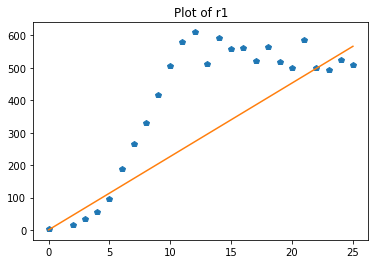

In [4]:

plt.plot(days,AurIso,'p',days,days*r1p,'-')
plt.title('Plot of r1')

Text(0.5, 1.0, 'Plot of r2')

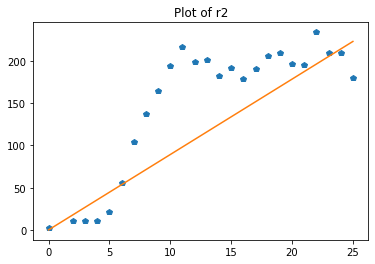

In [5]:

plt.plot(days,CauIso,'p',days,days*r2p,'-')
plt.title('Plot of r2')

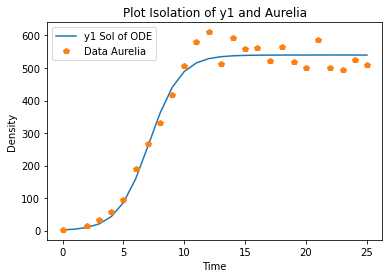

In [6]:
# Constants
r1 = r1p/28.828385
k = K1

# Define the differential equation as a function
def my_diffeq(t, y): #r and k constants
    dydt = r1 * y * (1 - y / k)
    return dydt

# Define the time span
#t_span = (days[0][0], days[len(days)-1][0])  # Start at t=0 and end at t=25
t_span = (0, 100)  # Start at t=0 and end at t=25
# Define the initial condition
y0 = AurIso[0]  # Initial value of y at t=0

# Solve the IVP using solve_ivp
sol = solve_ivp(my_diffeq, t_span, y0, t_eval=np.linspace(days[0][0], days[len(days)-1][0], 26))

# Extract the solution
tiso = sol.t
y1 = sol.y[0]  # y is the first element in the solution array

# Plot the solution
plt.plot(tiso, y1)
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Solution of the IVP')

plt.plot(days,AurIso,'p')
plt.title('Plot Isolation of y1 and Aurelia')
plt.legend(['y1 Sol of ODE','Data Aurelia'])
plt.show()


Lets try to make a better estimatio of $r_1$, for that we are going to program a funcion that will give us the error of $y_1$ (the sol of the ODE) and our data. Then we will just change $r_1$ to get a better approximation until we get a tolerancia we need.

In [7]:
def errorR(data,ysol,r):
    Error = np.zeros(10)
    Berror = 0
    #calular error dia 0
    Error[0] = (data[0]-ysol[0])[0]
    for i in range(9):
        Error[i+1] = (data[i]-ysol[i+1])[0] #Data doesnt count day 1,we need to go to day i+1 in the ode sol tocompare
    for j in range(9):
        if abs(Error[j]) > Berror:
            Berror = Error[j]
        else:
            Berror = Berror #nothing change  
    return([Berror,Error])

# Berror > 0 means that Aur > ysol => Can get higher r for better approximation. 
# Berror < 0 means that Aur < ysol => Can get lower r for better approximation. 
errorR(AurIso,y1,r1)

[30.27437195410394,
 array([  0.        ,  -2.37056675,   4.50049425,  13.58076012,
         13.10261314,   8.08391718,  30.27437195,   8.01784425,
        -30.27417815, -24.04719613])]

After a few tries with $r_1 = 0.7861619209387949$. 

Let's do the same but this time for $r_2$.

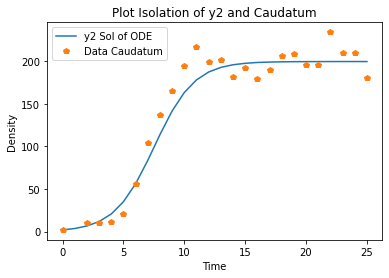

In [8]:
# Constants
r2 = r2p/14.65
k = K2

# Define the differential equation as a function
def my_diffeq(t, yt): #r and k constants
    dydt = r2 * yt * (1 - yt / k)
    return dydt


# Define the initial condition
y0 = CauIso[0]  # Initial value of y at t=0

# Solve the IVP using solve_ivp
sol = solve_ivp(my_diffeq, t_span, y0, t_eval=np.linspace(days[0][0], days[len(days)-1][0], 26))

# Extract the solution
t = sol.t
y2 = sol.y[0]  # y is the first element in the solution array

# Plot the solution
plt.plot(t, y2)
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Solution of the IVP')

plt.plot(days,CauIso,'p')
plt.title('Plot Isolation of y2 and Caudatum')
plt.legend(['y2 Sol of ODE','Data Caudatum'])
plt.show()


In [9]:
def errorR(data,ysol,r):
    Error = np.zeros(8)
    Berror = 0
    #calular error dia 0
    Error[0] = (data[0]-ysol[0])[0]
    for i in range(7):
        Error[i+1] = (data[i]-ysol[i+1])[0] #Data doesnt count day 1,we need to go to day i+1 in the ode sol tocompare
    for j in range(7):
        if abs(Error[j]) > Berror:
            Berror = Error[j]
        else:
            Berror = Berror #nothing change  
    return([Berror,Error])

# Berror > 0 means that Aur > ysol => Can get higher r for better approximation. 
# Berror < 0 means that Aur < ysol => Can get lower r for better approximation. 
errorR(CauIso,y2,r2)

[-0.17479608372161692,
 array([  0.        ,  -1.64716326,   3.39551899,  -1.81968989,
         -9.69231986, -14.04398892,  -0.17479608,  20.42077413])]

After a few tries with $r_2 = 0.609170299377703$. 

In [18]:
#Datos
#r=1 //.6
#r2 = .3
#alp = 2.36


#alp = 2.5 alp = 2.3
#bet = 0.37 bet = 0.43

alp = 2.2
bet = 0.37


def odesSystem(x, t):
    x1, x2 = x  # x is given by x1 and x2
    dx1dt = r1 * x1 * (1 - x1/K1 - alp* x2/K1)
    dx2dt = r2 * x2 * (1 - x2/K2 - bet* x1/K2)
    return [dx1dt, dx2dt]

x0 = [2., 2.]  # Initial conditions for AurCom and CauCom
t = np.linspace(0, 1000, 101) 
#t = np.linspace(0, 25, 26)  


solution = odeint(odesSystem, x0, t) #Solve de ODE's system

x1_solution = solution[:, 0]
x2_solution = solution[:, 1]

Text(0.5, 1.0, 'Plot competition of y1 and Aurelia')

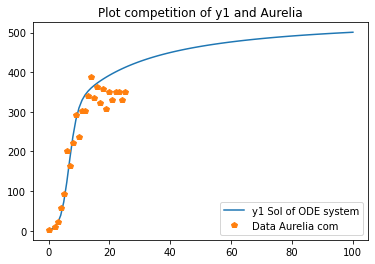

In [11]:
# Plot the solution ODE system for Aurelia
plt.plot(t,x1_solution) 
plt.plot(days,AurCom,'p')
plt.legend(["y1 Sol of ODE system","Data Aurelia com"])
plt.title("Plot competition of y1 and Aurelia") 

Text(0.5, 1.0, 'Plot competition of y1 Aurelia')

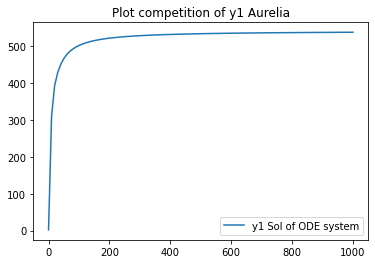

In [22]:
# Plot the solution ODE system for Aurelia
plt.plot(t,x1_solution) 
#plt.plot(t,np.ones(len(t))*K1,color='black') 
plt.legend(["y1 Sol of ODE system"])
plt.title("Plot competition of y1 Aurelia") 

Text(0.5, 1.0, 'Plot competition of y1 and Caudatum')

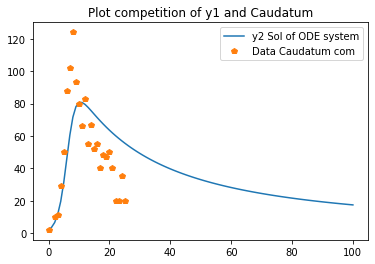

In [17]:
# Plot the solution ODE system for Caudatum
plt.plot(t,x2_solution) 
plt.plot(days,CauCom,'p')
plt.legend(["y2 Sol of ODE system","Data Caudatum com"])
plt.title("Plot competition of y1 and Caudatum") 

Text(0.5, 1.0, 'Plot competition of y1 Caudatum')

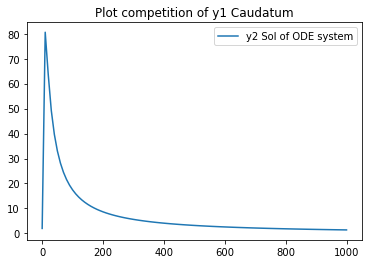

In [23]:
# Plot the solution ODE system for Caudatum
plt.plot(t,x2_solution) 

plt.legend(["y2 Sol of ODE system"])
plt.title("Plot competition of y1 Caudatum") 

This time, the relationship between $y_1$ and $y_2$ depending on $\alpha$ and $\beta$ is as follows:


If $\beta$ $\uparrow$ increases then $y_1$ $\uparrow$ increases, $y_2$ $\downarrow$ decreases (if $\beta$ $\downarrow$ decreases then $y_1$ $\downarrow$ decreases, $y_2$ $\uparrow$ increases).

If $\alpha$ $\uparrow$ increases $y_1$ $\downarrow$ decreases, $y_2$ $\uparrow$ increases (if $\alpha$ $\downarrow$ decreases then $y_1$ $\uparrow$ increases, $y_2$ $\downarrow$ decreases).

In [14]:
alp * K2/K1

0.813381178377127

In [15]:
bet * K1/K2

1.0007608015028178